# mplfinance
ファイナンスに特化した可視化ライブラリ。

ローソク足のグラフなどを簡単に作成できる

In [1]:
import mplfinance as mpf
from pandas_datareader import data
import yfinance as yf
import talib as ta
import warnings
warnings.simplefilter("ignore")

In [2]:
start = "2020-01-01"
end = "2020-06-30"
df = yf.download('^N225', start, end)
df.head(5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000
2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000
2020-01-09,23530.289062,23767.089844,23506.150391,23739.869141,23739.869141,62200000
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000


## ローソク足のグラフ

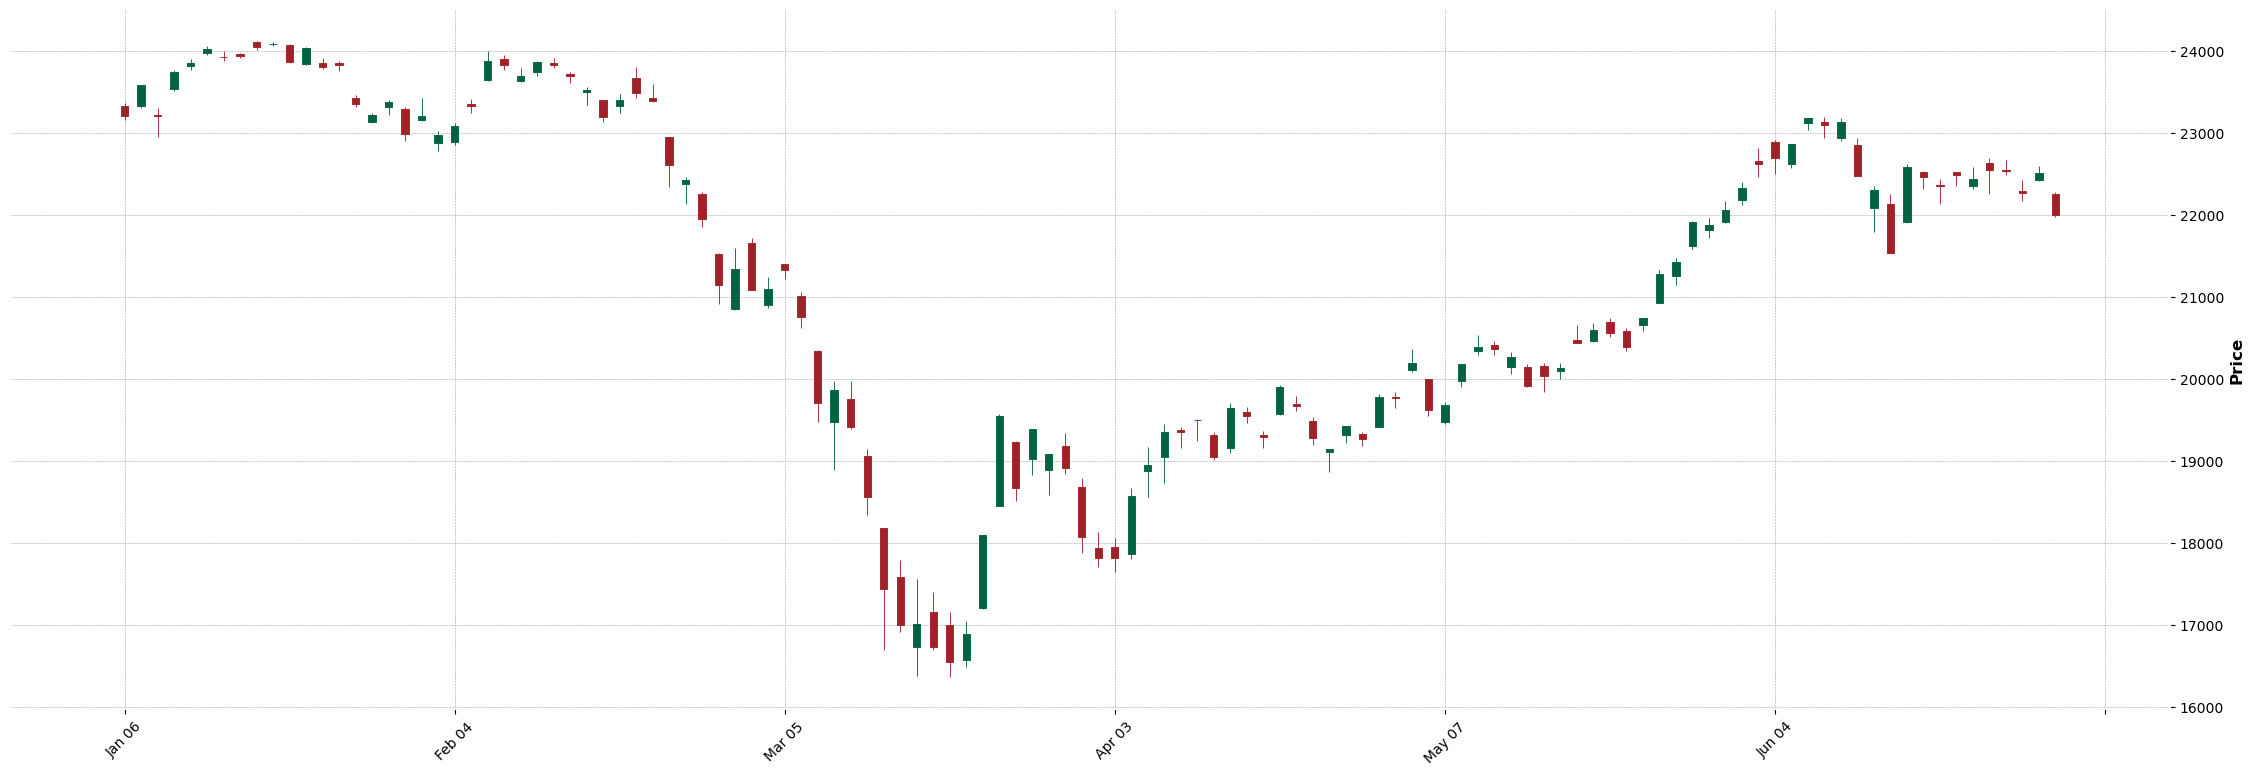

In [3]:
mpf.plot(df, type="candle", figsize=(30,10), style="charles")

### グラフに出来高(その日の取引量)を追加する

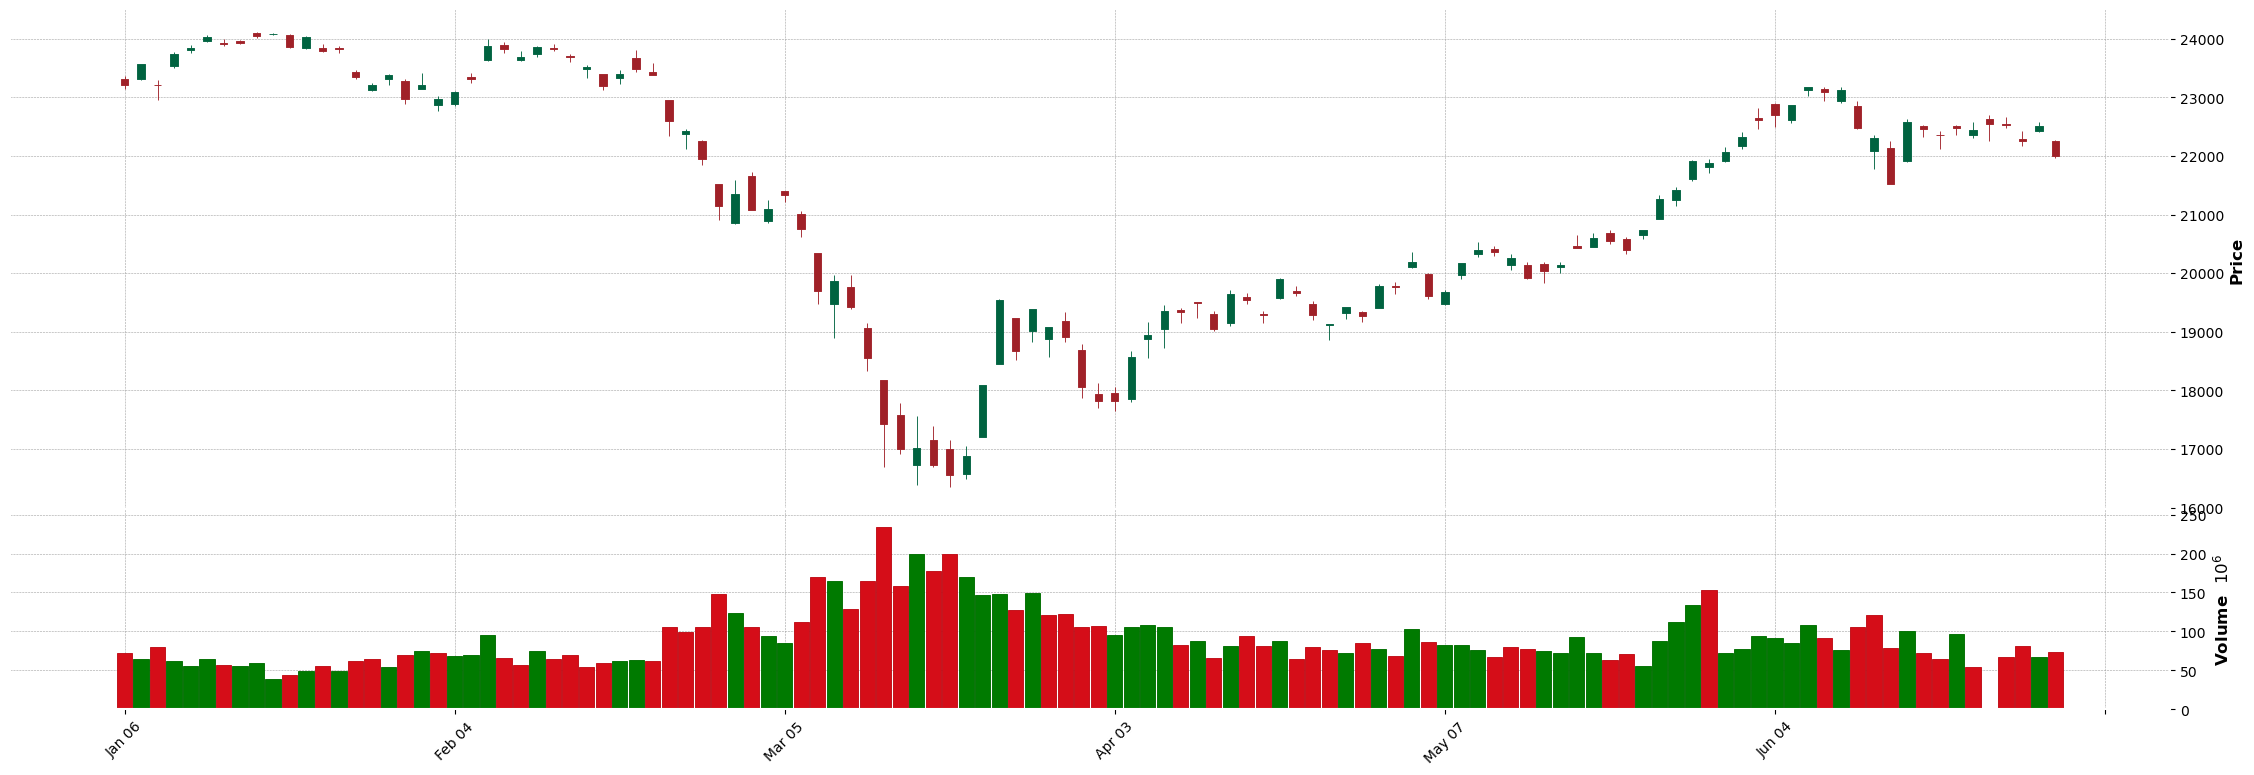

In [4]:
mpf.plot(df, type="candle", figsize=(30,10), style="charles", volume=True)

### MACD, RSI, ボリンジャーバンドの追加

In [9]:
df["macd"], df["macdsignal"], df["macdhist"] = ta.MACD(df["Adj Close"], fastperiod=12, slowperiod=26, signalperiod=9)
df["RSI"] = ta.RSI(df["Adj Close"], timeperiod=25)
df["upper"], df["middle"], df["lower"] = ta.BBANDS(df["Adj Close"], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,upper,middle,lower,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,,
2020-06-23,22636.060547,22693.890625,22257.140625,22549.050781,22549.050781,0,23699.792894,22075.402500,20451.012106,440.501875,543.504513,-103.002637,58.425218
2020-06-24,22541.009766,22663.289062,22479.859375,22534.320312,22534.320312,67000000,23668.783006,22152.969297,20637.155588,419.231405,518.649891,-99.418486,58.298703
2020-06-25,22287.869141,22423.410156,22165.140625,22259.789062,22259.789062,80800000,23589.084373,22221.268437,20853.452502,375.889013,490.097715,-114.208703,55.946788
2020-06-26,22424.369141,22589.140625,22408.269531,22512.080078,22512.080078,66600000,23454.238943,22306.225234,21158.211526,357.773441,463.632861,-105.859419,57.584822
2020-06-29,22255.050781,22281.380859,21969.589844,21995.039062,21995.039062,73700000,23321.613062,22356.360781,21391.108501,298.257702,430.557829,-132.300127,53.350032


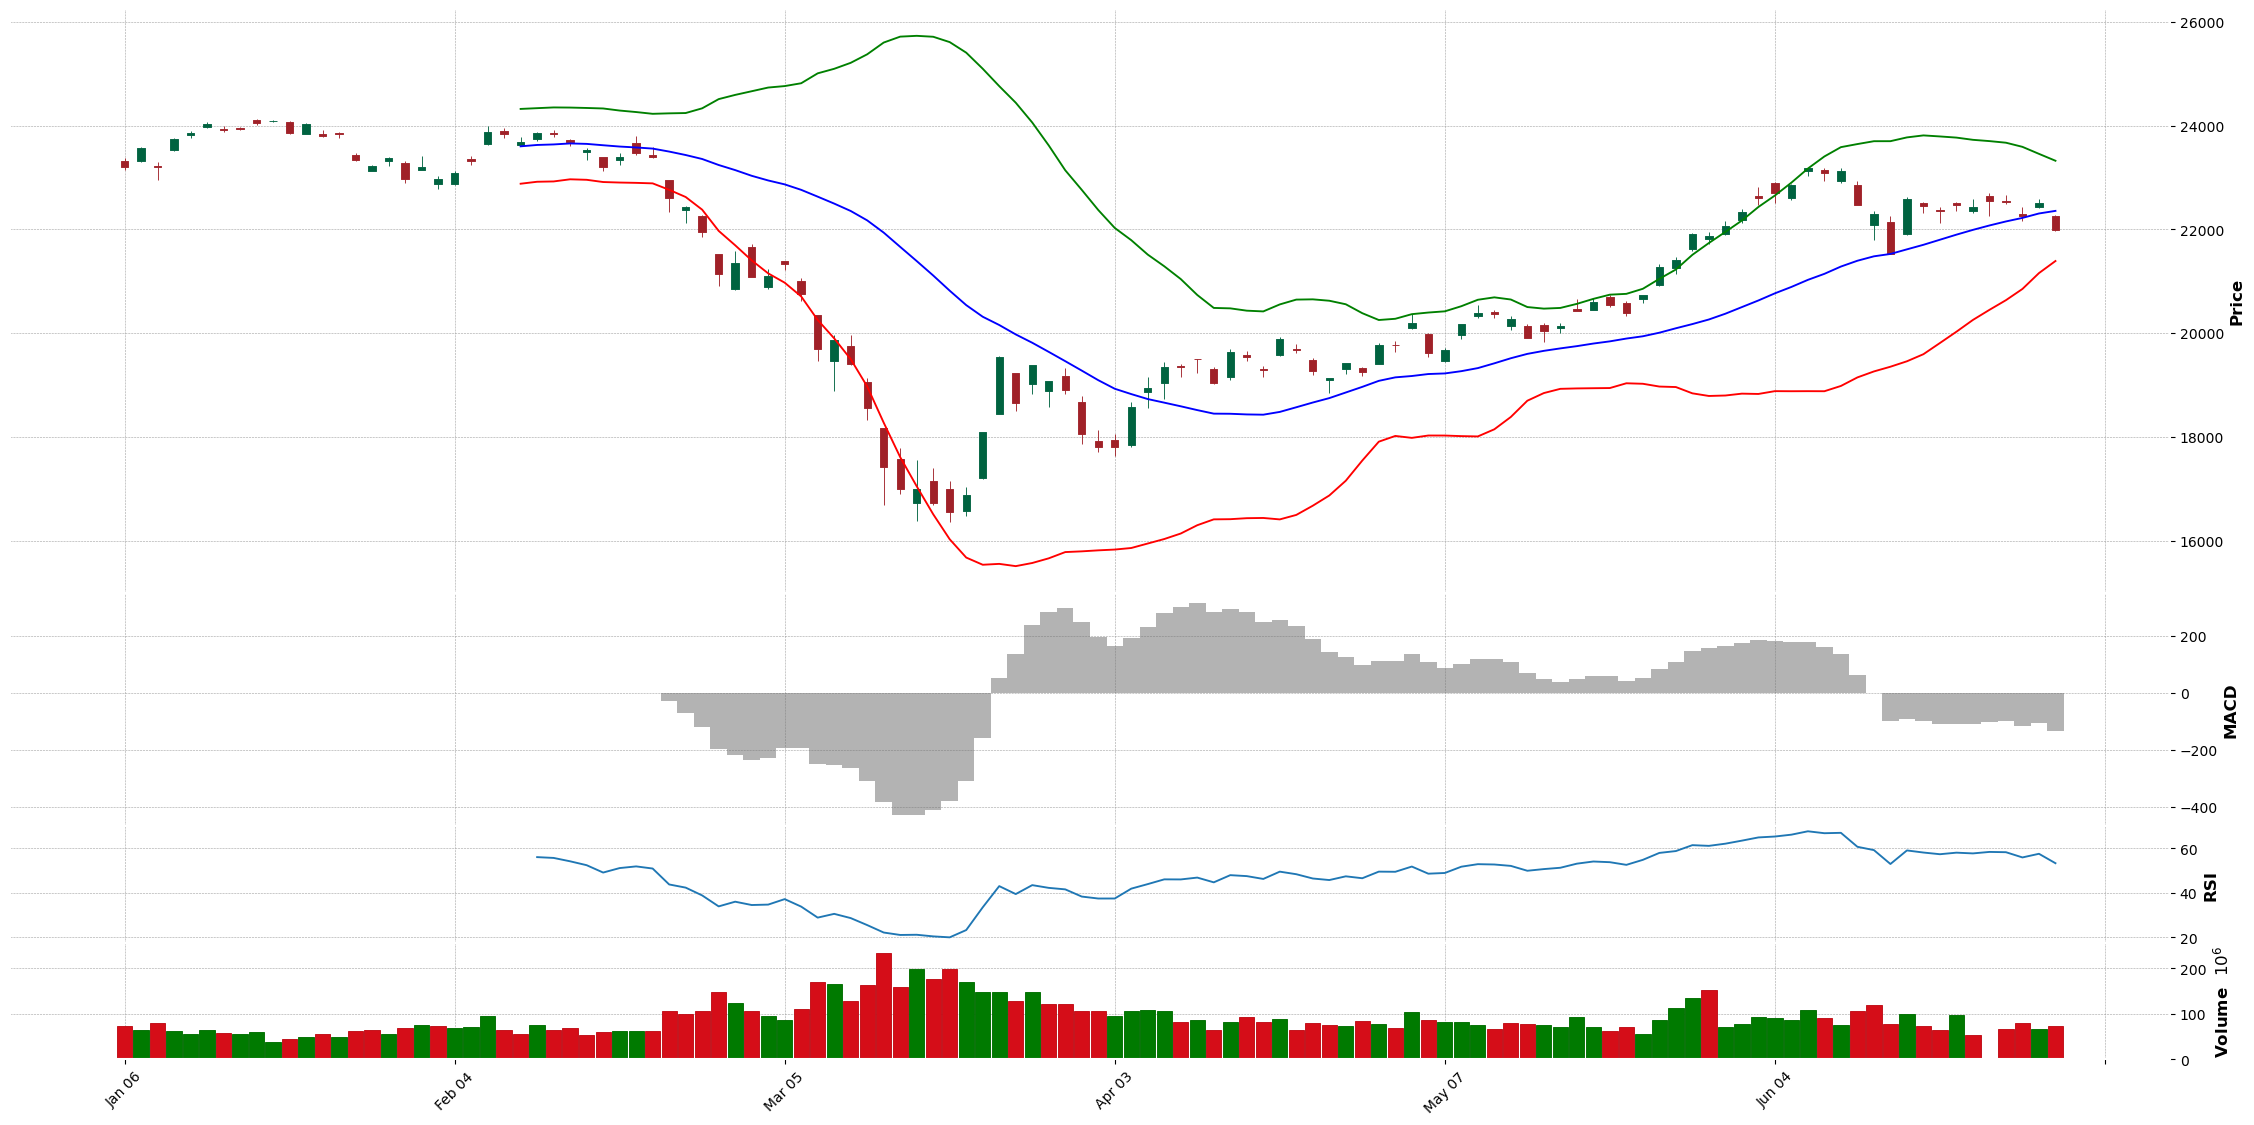

In [16]:
apds = [mpf.make_addplot(df["upper"], color="g"),
        mpf.make_addplot(df["middle"], color="b"),
        mpf.make_addplot(df["lower"], color="r"),
        mpf.make_addplot(df["macdhist"], type="bar", color="dimgray", width=1.0, panel=1, alpha=0.5, ylabel="MACD"),
        mpf.make_addplot(df["RSI"], panel=2, type="line", ylabel="RSI")
       ]
mpf.plot(
    df, 
    type="candle", 
    figsize=(30,15), 
    style="charles", 
    volume=True, 
    addplot=apds, 
    volume_panel=3,
    panel_ratios=(5,2,1,1),
    # 図を保存する場合は以下の引数を指定する
    # savefig="technical.png"
)
